# Backpropagation Algorithm From Scratch

To do:
    1. Load training/test data X/Y
    2. Create a NN using Feed Forward Architechture
    3. Calculate A loss Function
    4. Implement the optimization of the Loss Function through Backpropagation (Derive the math)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets

In [3]:
X, y = sklearn.datasets.load_boston(return_X_y=True)

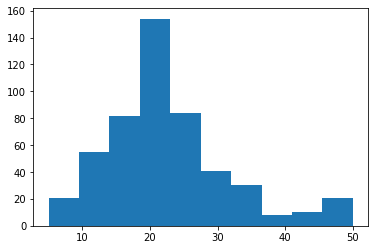

In [9]:
plt.hist(y)
plt.show()

The Back-propagation algorithm

A feedforward model considers the consecutive application of linear transformations, followed by non-linear activation functions:

$$
f_0 = x \\
f_i = \sigma_i(A_i f_i+b_{i-1})
$$

The chain rule says:

$$
\dfrac{\partial L}{\partial \theta_i} = \dfrac{\partial L}{\partial f_K} \dfrac{\partial f_K}{\partial f_{K-1}} \cdots \dfrac{\partial f_{i+2}}{\partial f_{i+1}} \dfrac{\partial f_{i+1}}{\partial \theta_i }
$$


We start by considering a simple case, in which the activation function is just the sigmoid function

In [75]:
class NeuralNetwork():
    def __init__(self, input_dim, hidden_layers, output_dim):
        
        # Shapes of input, output and weight matrices
        self.i_d = input_dim
        self.o_d = output_dim
        self.hidden_layers = hidden_layers
        
        # Init weights
        self.init_weights()
        
    
    # Loss Function
    def loss(self, y_true, y_pred):
        return np.linalg.norm(y_true-y_pred)
    
    # Initialize random weights
    def init_weights(self):
        layers =  [self.i_d]+self.hidden_layers+[self.o_d]
        self.weights = [np.random.rand(layers[i+1], layers[i]) for i in range(len(layers)-1)]
        self.biases = [np.random.rand(layers[i+1]) for i in range(len(layers)-1)]
    
    @staticmethod
    def sigmoid(self, x):
        return np.exp(x)/(1+np.exp(x))
    
    @staticmethod
    def sigmoid_derivative(self, x):
        return self.sigmoid(x)*(1.0-self.sigmoid(x))

    def forward_propagation(self, x):
        z = np.copy(x)
        for (w,b) in zip(self.weights, self.biases):
            z = self.sigmoid(np.matmul(w, z)+b)
        return z
        
    def backward_propagation(self, x, y):
        return None
    
    def train(self):
        pass
    
        
        

In [76]:
input_dim = X.shape[1]
output_dim = 1
layers = [16, 8, 4]

In [77]:
model = NeuralNetwork(input_dim, layers, output_dim)
z = model.forward_propagation(X[1])

In [78]:
z

array([14854.18677312])